# Multi-class image classification

In [32]:
## All imports needed
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os

from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


## One-class per-image
### Plant Seedlings 
From https://www.kaggle.com/c/plant-seedlings-classification

First we need to get hold of the data. Using the kaggle API and then extracting the compressed files:

In [ ]:
! kaggle competitions download -c plant-seedlings-classification

os.makedirs('data', exist_ok=True)
! cp -R ~/.kaggle/competitions/plant-seedlings-classification/ data/
! cd data/plant-seedlings-classification/ && unzip train.zip
! cd data/plant-seedlings-classification/ && unzip test.zip

Use the Fast AI data loader to load from directories organised as `../train/class1`, `../train/class2` etc.

In [30]:
PATH = 'data/plant-seedlings-classification'

print('\nTraining data folder contains a folder per class:\n')
!ls $PATH/train
print('\nEach class folder contains images:\n')
!ls $PATH/train/Black-grass | head 


Training data folder contains a folder per class:

Black-grass  Common Chickweed  Loose Silky-bent   Shepherds Purse
Charlock     Common wheat      Maize		  Small-flowered Cranesbill
Cleavers     Fat Hen	       Scentless Mayweed  Sugar beet

Each class folder contains images:

0050f38b3.png
0183fdf68.png
0260cffa8.png
05eedce4d.png
075d004bc.png
078eae073.png
082314602.png
0ace21089.png
0b228a6b8.png
0b3e7a7a9.png


The data doesn't include a validation set, so we'll make one by taking 20% of the training set and putting it into a folder `valid/`

In [35]:
categories = os.listdir(f'{PATH}/train')

os.makedirs(f'{PATH}/valid', exist_ok=True)

for category in categories:
    os.makedirs(f'{PATH}/valid/{category}', exist_ok=True)
    
    files = os.listdir(f'{PATH}/train/{category}')
    
    valid_files = random.sample(files, math.floor(len(files) * 0.2))

    for f in valid_files:
        os.rename(f'{PATH}/train/{category}/{f}', f'{PATH}/valid/{category}/{f}')

Use the FastAI data loader to prepare the data for a resnet34 pre-trained model.

In [ ]:
arch=resnet34
sz = 224

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

Have a look at the data to get a sense of what it's doing

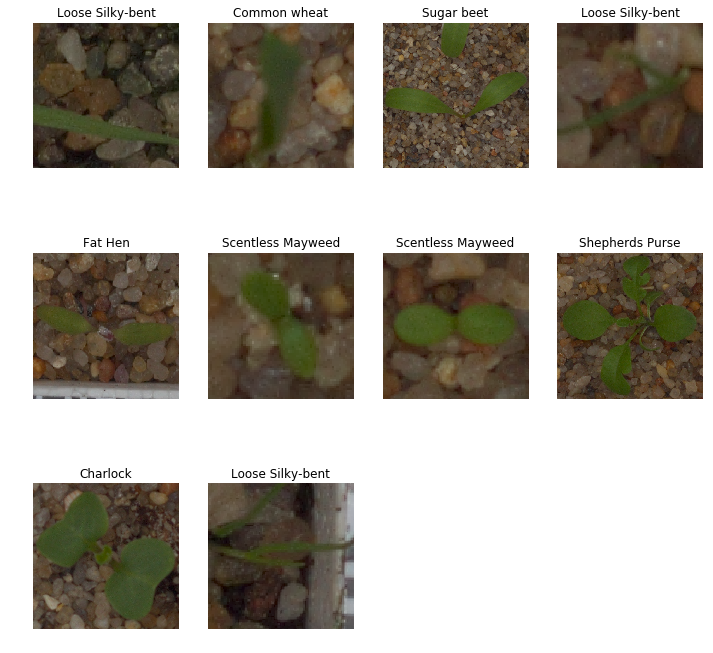

In [111]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+'/'+ds.fnames[idx]))

def get_random_img_with_class(model_data):
    ds = model_data.trn_ds
    
    idx = random.randint(0,len(ds))
    img = load_img_id(ds, idx)
    class_name = model_data.classes[model_data.trn_y[idx]]
    
    return img, class_name
    
f = plt.figure(figsize=(12,12))
for i in range(0,10):
    sp = f.add_subplot(3, 4, i+1)
    sp.axis('Off')
    
    img, class_name = get_random_img_with_class(data)
    sp.set_title(class_name)
    plt.imshow(img)

In [ ]:
learn = ConvLearner.pretrained(resnet34, get_data(64), precompute=False)